In [1]:
import os

path_IXI_temp_sample = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample"
path_input = os.path.join(path_IXI_temp_sample, "input_skull_stripped")
path_ground_truth = os.path.join(path_IXI_temp_sample, "ground_truth")
# path_prediction_without_fine_tuning = os.path.join(path_IXI_temp_sample, "output_without_fine_tuning")
# path_prediction_with_fine_tuning = os.path.join(path_IXI_temp_sample, "output_with_fine_tuning")

path_prediction_without_fine_tuning = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/output_without_fine_tuning_and_preprocessing_and_stripping"
path_prediction_with_fine_tuning = "/home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/output_with_fine_tuning_and_preprocessing_and_stripping"

# get all the nii.gz files in each folder
input_files = [f for f in os.listdir(path_input) if f.endswith('.nii.gz')]
ground_truth_files = [f for f in os.listdir(path_ground_truth) if f.endswith('.nii.gz')]

# Fix the ground truth files by removing the "_GT" part from the file name and renaming them
for i in range(len(ground_truth_files)):
    if "_GT" in ground_truth_files[i]:
        new_filename = ground_truth_files[i].replace("_GT", "")
        old_path = os.path.join(path_ground_truth, ground_truth_files[i])
        new_path = os.path.join(path_ground_truth, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        
        # Update the file name in the ground_truth_files list
        ground_truth_files[i] = new_filename



prediction_without_fine_tuning_files = [f for f in os.listdir(path_prediction_without_fine_tuning) if f.endswith('.nii.gz')]
prediction_with_fine_tuning_files = [f for f in os.listdir(path_prediction_with_fine_tuning) if f.endswith('.nii.gz')]

# print the number of files in each folder
print("Number of input files: ", len(input_files))
print("Number of ground truth files: ", len(ground_truth_files))
print("Number of prediction without fine tuning files: ", len(prediction_without_fine_tuning_files))
print("Number of prediction with fine tuning files: ", len(prediction_with_fine_tuning_files))

import os

def get_quadruplets(input_dir, gr_dir, pred_wo_ft_dir, pred_w_ft_dir):
    """
    Scans the provided directories for .nii.gz files and returns a list of dictionaries.
    Each dictionary contains the paths to the input, ground truth, prediction without fine-tuning,
    and prediction with fine-tuning files. Only quadruplets where all four files exist are included.
    Missing files are printed out.

    Parameters:
        input_dir (str): Path to the "input" directory.
        gr_dir (str): Path to the "ground_truth" directory.
        pred_wo_ft_dir (str): Path to the "output_without_fine_tuning" directory.
        pred_w_ft_dir (str): Path to the "output_with_fine_tuning" directory.

    Returns:
        list of dict: A list where each element is a dictionary with keys:
                      'input', 'gr', 'prediction_wo_fine_tuning', 'prediction_w_fine_tuning'.
    """
    
    # List all .nii.gz files in each directory
    try:
        input_files = [f for f in os.listdir(input_dir) if f.endswith('.nii.gz')]
    except FileNotFoundError:
        print(f"Input directory not found: {input_dir}")
        return []
    
    try:
        gr_files = set([f for f in os.listdir(gr_dir) if f.endswith('.nii.gz')])
    except FileNotFoundError:
        print(f"Ground truth directory not found: {gr_dir}")
        gr_files = set()
    
    try:
        pred_wo_ft_files = set([f for f in os.listdir(pred_wo_ft_dir) if f.endswith('.nii.gz')])
    except FileNotFoundError:
        print(f"Prediction without fine-tuning directory not found: {pred_wo_ft_dir}")
        pred_wo_ft_files = set()
    
    try:
        pred_w_ft_files = set([f for f in os.listdir(pred_w_ft_dir) if f.endswith('.nii.gz')])
    except FileNotFoundError:
        print(f"Prediction with fine-tuning directory not found: {pred_w_ft_dir}")
        pred_w_ft_files = set()
    
    quadruplets = []
    
    for filename in input_files:
        missing_files = []
        
        # Check for existence in ground truth
        if filename not in gr_files:
            missing_files.append(os.path.join(gr_dir, filename))
        
        # Check for existence in predictions without fine-tuning
        if filename not in pred_wo_ft_files:
            missing_files.append(os.path.join(pred_wo_ft_dir, filename))
        
        # Check for existence in predictions with fine-tuning
        if filename not in pred_w_ft_files:
            missing_files.append(os.path.join(pred_w_ft_dir, filename))
        
        if missing_files:
            print(f"Missing files for '{filename}':")
            for missing in missing_files:
                print(f"  - {missing}")
            continue  # Skip appending this quadruplet
        
        # All files exist; append the quadruplet
        quadruplet = {
            "input": os.path.join(input_dir, filename),
            "gr": os.path.join(gr_dir, filename),
            "prediction_wo_fine_tuning": os.path.join(pred_wo_ft_dir, filename),
            "prediction_w_fine_tuning": os.path.join(pred_w_ft_dir, filename)
        }
        
        quadruplets.append(quadruplet)
    
    return quadruplets


# Get the list of quadruplets
quadruplets = get_quadruplets(
    input_dir=path_input,
    gr_dir=path_ground_truth,
    pred_wo_ft_dir=path_prediction_without_fine_tuning,
    pred_w_ft_dir=path_prediction_with_fine_tuning
)

# Print the number of valid quadruplets
print("Number of valid quadruplets:", len(quadruplets))

# Optionally, print the quadruplets
for idx, quad in enumerate(quadruplets, 1):
    print(f"Quadruplet {idx}:")
    print(f"  Input: {quad['input']}")
    print(f"  Ground Truth: {quad['gr']}")
    print(f"  Prediction without Fine Tuning: {quad['prediction_wo_fine_tuning']}")
    print(f"  Prediction with Fine Tuning: {quad['prediction_w_fine_tuning']}\n")


Number of input files:  45
Number of ground truth files:  45
Number of prediction without fine tuning files:  45
Number of prediction with fine tuning files:  45
Number of valid quadruplets: 45
Quadruplet 1:
  Input: /home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/input_skull_stripped/part3_IXI561-IOP-1152-MRA.nii.gz
  Ground Truth: /home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/ground_truth/part3_IXI561-IOP-1152-MRA.nii.gz
  Prediction without Fine Tuning: /home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/output_without_fine_tuning_and_preprocessing_and_stripping/part3_IXI561-IOP-1152-MRA.nii.gz
  Prediction with Fine Tuning: /home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/output_with_fine_tuning_and_preprocessing_and_stripping/part3_IXI561-IOP-1152-MRA.nii.gz

Quadruplet 2:
  Input: /home/fp427/rds/rds-cam-segm-7tts6phZ4tw/mission/data/IXI_temp_sample/input_skull_stripped/part1_IXI291-IOP-0882-MRA.

In [2]:
# check the unique values:

import nibabel as nib
# load the first quadruplet
quad = quadruplets[0]
input = nib.load(quad['input'])
gr = nib.load(quad['gr'])
pred_wo_ft = nib.load(quad['prediction_wo_fine_tuning'])
pred_w_ft = nib.load(quad['prediction_w_fine_tuning'])

# print the unique values for each image
unique_values_input = set(input.get_fdata().flatten())
unique_values_gr = set(gr.get_fdata().flatten())
unique_values_pred_wo_ft = set(pred_wo_ft.get_fdata().flatten())
unique_values_pred_w_ft = set(pred_w_ft.get_fdata().flatten())

# print
print("Unique values in the input image: ", unique_values_input)
print("Unique values in the ground truth image: ", unique_values_gr)
print("Unique values in the prediction without fine tuning image: ", unique_values_pred_wo_ft)
print("Unique values in the prediction with fine tuning image: ", unique_values_pred_w_ft)

Unique values in the input image:  {0.0, 2.0, 3.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0,

In [3]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

def visualize_quadruplets(quadruplets):
    """
    Visualizes the quadruplets interactively using ipywidgets sliders to navigate through image slices.
    Each quadruplet includes an input image, ground truth, prediction without fine-tuning, 
    and prediction with fine-tuning, all displayed side by side.
    
    Args:
        quadruplets (list of dict): List of quadruplets where each quadruplet is a dictionary with 
                                    keys 'input', 'gr', 'prediction_wo_fine_tuning', and 'prediction_w_fine_tuning'.
    """
    
    def load_nifti_image(file_path):
        """Loads a NIfTI file and returns its image data as a NumPy array."""
        try:
            nifti_img = nib.load(file_path)
            return nifti_img.get_fdata()
        except Exception as e:
            print(f"Error loading file {file_path}: {e}")
            return None
    
    def plot_images(slice_idx, quadruplet_idx):
        """Plots the four images of a quadruplet for the selected slice."""
        # Load the images for the selected quadruplet
        input_img = load_nifti_image(quadruplets[quadruplet_idx]['input'])
        gr_img = load_nifti_image(quadruplets[quadruplet_idx]['gr'])
        pred_wo_ft_img = load_nifti_image(quadruplets[quadruplet_idx]['prediction_wo_fine_tuning'])
        pred_w_ft_img = load_nifti_image(quadruplets[quadruplet_idx]['prediction_w_fine_tuning'])
        
        if input_img is None or gr_img is None or pred_wo_ft_img is None or pred_w_ft_img is None:
            print(f"Error: Unable to load one or more images for quadruplet {quadruplet_idx}")
            return
        
        # Ensure the slice index is within the valid range
        slice_idx = min(slice_idx, input_img.shape[2] - 1)
        
        # Extract the 2D slice for each of the 3D volumes
        input_slice = input_img[:, :, slice_idx]
        gr_slice = gr_img[:, :, slice_idx]
        pred_wo_ft_slice = pred_wo_ft_img[:, :, slice_idx]
        pred_w_ft_slice = pred_w_ft_img[:, :, slice_idx]
        
        # Create the figure with 4 subplots (1 row, 4 columns)
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))
        
        # Display each of the 4 images
        axs[0].imshow(input_slice, cmap='gray')
        axs[0].axis('off')
        axs[0].set_title('Input MRI', fontsize=12)
        
        axs[1].imshow(gr_slice, cmap='gray', vmin=0, vmax=1)
        axs[1].axis('off')
        axs[1].set_title('Ground Truth', fontsize=12)
        
        axs[2].imshow(pred_wo_ft_slice, cmap='gray', vmin=0, vmax=1)
        axs[2].axis('off')
        axs[2].set_title('Prediction w/o Fine Tuning', fontsize=12)
        
        axs[3].imshow(pred_w_ft_slice, cmap='gray', vmin=0, vmax=1)
        axs[3].axis('off')
        axs[3].set_title('Prediction w/ Fine Tuning', fontsize=12)
        
        # Add legends for binary classification (Black = 0, White = Vessel)
        for ax in axs[1:]:
            class_legend = plt.Line2D([0], [0], color="black", lw=4, label='Class 0 (Background)')
            vessel_legend = plt.Line2D([0], [0], color="white", lw=4, label='Class 1 (Vessel)')
            ax.legend(handles=[class_legend, vessel_legend], loc='lower right', fontsize=8)
        
        # Adjust layout
        plt.tight_layout()
        plt.show()
    
    def update_plot(slice_idx, quadruplet_idx):
        """Wrapper function to update the plot using the ipywidgets slider."""
        plt.close('all')
        plot_images(slice_idx, quadruplet_idx)
    
    # Check that quadruplets are not empty
    if len(quadruplets) == 0:
        print("No quadruplets available to visualize.")
        return
    
    # Load the first quadruplet to get the image shape
    first_img = load_nifti_image(quadruplets[0]['input'])
    if first_img is None:
        print("Error: Unable to load the first quadruplet's input image.")
        return
    max_slices = first_img.shape[2]
    
    # Create the interactive widgets for controlling the slice index and quadruplet index
    slice_slider = widgets.IntSlider(
        value=max_slices // 2, 
        min=0, 
        max=max_slices - 1, 
        step=1, 
        description='Slice Index', 
        continuous_update=False
    )
    
    quadruplet_slider = widgets.IntSlider(
        value=0, 
        min=0, 
        max=len(quadruplets) - 1, 
        step=1, 
        description='Quadruplet Index', 
        continuous_update=False
    )
    
    # Create an interactive display
    interactive_plot = widgets.interactive(
        update_plot, 
        slice_idx=slice_slider, 
        quadruplet_idx=quadruplet_slider
    )
    
    # Display the interactive sliders and the visualization
    display(interactive_plot)


# Call the visualization function to display the quadruplets
visualize_quadruplets(quadruplets)


interactive(children=(IntSlider(value=46, continuous_update=False, description='Slice Index', max=91), IntSlid…

Computing Dice scores:   0%|          | 0/45 [00:00<?, ?it/s]

Computing Dice scores: 100%|██████████| 45/45 [09:28<00:00, 12.63s/it]
<ipython-input-4-a9660f7c7c64>:120: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(



Dice Scores Summary:
Background (No Fine-Tuning) - Mean Dice Score: 0.9668
Vessel (No Fine-Tuning) - Mean Dice Score: 0.0469
Background (Fine-Tuning) - Mean Dice Score: 0.9064
Vessel (Fine-Tuning) - Mean Dice Score: 0.0251


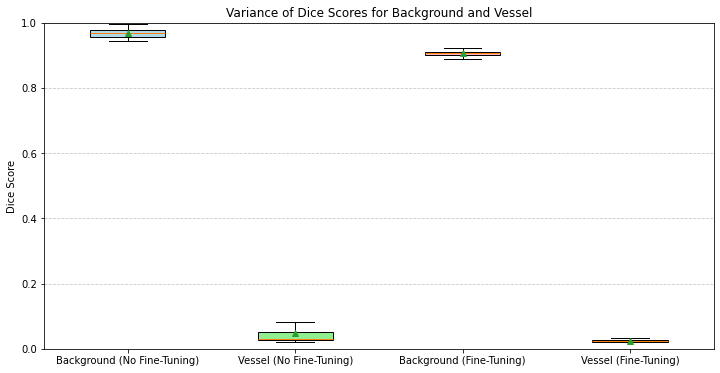

In [4]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def dice_score(segmentation1, segmentation2):
    """
    Computes the Dice coefficient between two binary segmentations.

    Parameters:
        segmentation1 (np.ndarray): Binary segmentation (0 and 1).
        segmentation2 (np.ndarray): Binary segmentation (0 and 1).

    Returns:
        float: Dice coefficient.
    """
    intersection = np.sum(segmentation1 * segmentation2)
    sum_of_volumes = np.sum(segmentation1) + np.sum(segmentation2)
    if sum_of_volumes == 0:  # To avoid division by zero
        return 1.0 if intersection == 0 else 0.0
    return 2.0 * intersection / sum_of_volumes

def compute_dice_scores(quadruplets):
    """
    Computes the Dice scores for background and vessel (class 1) for all quadruplets.
    It computes Dice scores for both the fine-tuned and non-fine-tuned versions.

    Parameters:
        quadruplets (list of dict): List of quadruplets containing paths to input, ground truth, 
                                    predictions with and without fine-tuning.

    Returns:
        dict: A dictionary containing Dice scores for both background and vessels for 
              fine-tuned and non-fine-tuned predictions.
    """
    dice_scores = {
        'background_without_fine_tuning': [],
        'vessel_without_fine_tuning': [],
        'background_with_fine_tuning': [],
        'vessel_with_fine_tuning': []
    }

    for quad in tqdm(quadruplets, desc="Computing Dice scores"):
        # Load the ground truth and predictions
        ground_truth = nib.load(quad['gr']).get_fdata()
        prediction_wo_ft = nib.load(quad['prediction_wo_fine_tuning']).get_fdata()
        prediction_w_ft = nib.load(quad['prediction_w_fine_tuning']).get_fdata()

        # Ensure binary masks for ground truth and predictions
        ground_truth_binary = (ground_truth > 0).astype(np.uint8)
        prediction_wo_ft_binary = (prediction_wo_ft > 0).astype(np.uint8)
        prediction_w_ft_binary = (prediction_w_ft > 0).astype(np.uint8)
        
        # Compute Dice scores for background (class 0)
        background_gt = (ground_truth_binary == 0).astype(np.uint8)
        background_wo_ft = (prediction_wo_ft_binary == 0).astype(np.uint8)
        background_w_ft = (prediction_w_ft_binary == 0).astype(np.uint8)

        dice_bg_wo_ft = dice_score(background_gt, background_wo_ft)
        dice_bg_w_ft = dice_score(background_gt, background_w_ft)

        # Compute Dice scores for vessel (class 1)
        vessel_gt = (ground_truth_binary == 1).astype(np.uint8)
        vessel_wo_ft = (prediction_wo_ft_binary == 1).astype(np.uint8)
        vessel_w_ft = (prediction_w_ft_binary == 1).astype(np.uint8)

        dice_vessel_wo_ft = dice_score(vessel_gt, vessel_wo_ft)
        dice_vessel_w_ft = dice_score(vessel_gt, vessel_w_ft)

        # Store the results
        dice_scores['background_without_fine_tuning'].append(dice_bg_wo_ft)
        dice_scores['vessel_without_fine_tuning'].append(dice_vessel_wo_ft)
        dice_scores['background_with_fine_tuning'].append(dice_bg_w_ft)
        dice_scores['vessel_with_fine_tuning'].append(dice_vessel_w_ft)

    # Calculate mean Dice scores for each category
    mean_dice_scores = {
        'mean_background_without_fine_tuning': np.mean(dice_scores['background_without_fine_tuning']),
        'mean_vessel_without_fine_tuning': np.mean(dice_scores['vessel_without_fine_tuning']),
        'mean_background_with_fine_tuning': np.mean(dice_scores['background_with_fine_tuning']),
        'mean_vessel_with_fine_tuning': np.mean(dice_scores['vessel_with_fine_tuning']),
    }

    # Print the computed Dice scores
    print("\nDice Scores Summary:")
    print(f"Background (No Fine-Tuning) - Mean Dice Score: {mean_dice_scores['mean_background_without_fine_tuning']:.4f}")
    print(f"Vessel (No Fine-Tuning) - Mean Dice Score: {mean_dice_scores['mean_vessel_without_fine_tuning']:.4f}")
    print(f"Background (Fine-Tuning) - Mean Dice Score: {mean_dice_scores['mean_background_with_fine_tuning']:.4f}")
    print(f"Vessel (Fine-Tuning) - Mean Dice Score: {mean_dice_scores['mean_vessel_with_fine_tuning']:.4f}")
    
    return dice_scores

def plot_dice_score_variance(dice_scores):
    """
    Plots a boxplot to visualize the variance of Dice scores for background and vessel 
    for both fine-tuned and non-fine-tuned models.

    Parameters:
        dice_scores (dict): Dictionary of Dice scores containing the Dice scores for 
                            background and vessels for both fine-tuned and non-fine-tuned models.
    """
    plt.figure(figsize=(12, 6))

    # Prepare data for boxplot
    data = [
        dice_scores['background_without_fine_tuning'],
        dice_scores['vessel_without_fine_tuning'],
        dice_scores['background_with_fine_tuning'],
        dice_scores['vessel_with_fine_tuning']
    ]

    labels = [
        'Background (No Fine-Tuning)', 
        'Vessel (No Fine-Tuning)', 
        'Background (Fine-Tuning)', 
        'Vessel (Fine-Tuning)'
    ]

    # Create the boxplot
    box = plt.boxplot(
        data, 
        patch_artist=True, 
        labels=labels, 
        showmeans=True, 
        showfliers=False  # Hides the outliers
    )

    # Customize boxplot appearance
    colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    
    plt.title('Variance of Dice Scores for Background and Vessel')
    plt.ylabel('Dice Score')
    plt.ylim(0, 1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Compute the Dice scores for the quadruplets
dice_scores = compute_dice_scores(quadruplets)

# Plotting the variance of Dice scores
plot_dice_score_variance(dice_scores)
